# 3D-Plotting

In [4]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
from math import log
from sympy import symbols, diff
from matplotlib import cm
from mpl_toolkits.mplot3d.axes3d import Axes3D

##  $$f(x, y) = \frac{1}{3^{-x^2 - y^2} + 1}$$

## $$ f(x, y) = \frac{1}{r + 1}$$ where $r$ is $3^{-x^2 - y^2}$

In [5]:
# put this function in python code...
def f(x,y): 
    r = 3**(-x**2 - y**2)
    return 1/(r+1)

In [6]:
x_4 = np.linspace(start = -2, stop = 2, num = 200)
y_4 = np.linspace(start=-2, stop=2, num=200)    

In [7]:
x_4, y_4 = np.meshgrid(x_4, y_4)

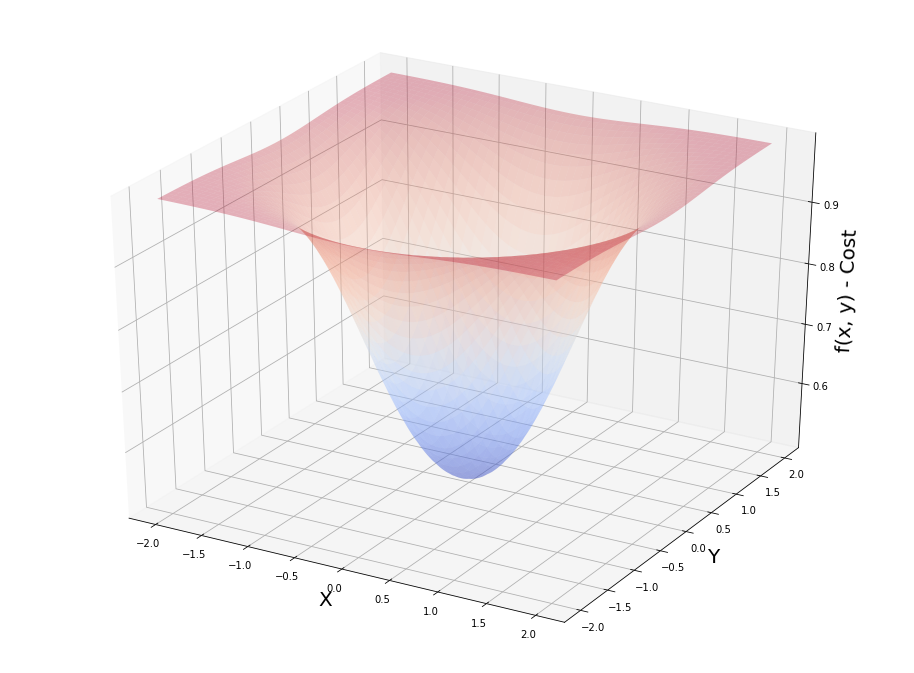

In [8]:
fig = plt.figure(figsize = (16,12))
ax = fig.gca(projection = '3d') #gca-->Get Current axis
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4,y_4), cmap = cm.coolwarm, alpha = 0.3)

plt.show()

# EXAMPLE-1

## $$f(x, y) = \frac{1}{3^{-x^2 - y^2} + 1}$$

## $$\frac{\partial f}{\partial x} = \frac{2x \ln(3) \cdot 3^{-x^2 - y^2}}{\left( 3^{-x^2 - y^2} + 1 \right) ^2}$$

## $$\frac{\partial f}{\partial y} = \frac{2y \ln(3) \cdot 3^{-x^2 - y^2}}{\left( 3^{-x^2 - y^2} + 1 \right) ^2}$$

In [9]:
#Differentating using Sympy
a, b = symbols('x, y')
print('Our  f(x, y) is                   : ', f(a, b))
print('PD wrt x is                       : ', diff(f(a, b), a))
print('PD wrt y is                       : ', diff(f(a, b), b))

Our  f(x, y) is                   :  1/(3**(-x**2 - y**2) + 1)
PD wrt x is                       :  2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
PD wrt y is                       :  2*3**(-x**2 - y**2)*y*log(3)/(3**(-x**2 - y**2) + 1)**2


In [10]:
#Giving values to the Variable
print('Value of f(x,y) at x=1.8 y=1.0 is : ', f(a, b).evalf(subs={a:1.8, b:1.0}))
print('Value of PD wrt x                 : ', diff(f(a, b), a).evalf(subs={a:1.8, b:1.0}))

Value of f(x,y) at x=1.8 y=1.0 is :  0.990604794032582
Value of PD wrt x                 :  0.0368089716197505


In [19]:
#Gradient Descent
params = np.array([1.8, 1.0])# initial guess
multiplier = 0.1 # gamma, learning rate ...(stretch only in our class, you will not find it in the books)
max_iter = 1000
for n in range(max_iter):
    
    gradient_x = diff(f(a,b),a).evalf(subs={a:params[0], b:params[1]}) # pd wrt x
    gradient_y = diff(f(a,b),b).evalf(subs={a:params[0], b:params[1]}) # pd wrt y
    gradients  = np.array([gradient_x, gradient_y])
    params     = params - multiplier * gradients # This is the GD algorithm 
# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

Values in gradient array [1.08410585157738e-23 6.02281028654100e-24]
Minimum occurs at x value of:  1.86518075868510e-23
Minimum occurs at y value of:  1.03621153260284e-23
The cost is:  0.500000000000000


## Without Sympy

In [20]:
def fpx(x,y):  
    r=3**(-x**2 -y**2) 
    return 2*x*log(3)*r /(r+1)**2
    

In [21]:
def fpy(x,y):
    r=3**(-x**2 -y**2)
    return 2*y*log(3)*r /(r+1)**2
    

In [22]:
# the Gradient descent
multiplier = 0.1 # learning rate or gamma
max_iter = 1000  # number of times the loop will run....it will run for (max_iter) + 1 times
params = np.array([1.8, 1.0]) # initial guess of x and y, x = 1.8 and y = 1.0
values_array = params.reshape(1,2) # one row and two cols, so that I get a table of x's and y's
for n in range(max_iter):  
    gradient_x = fpx(params[0], params[1])  # slope in the x direction
    gradient_y = fpy(params[0], params[1])  # slope in the y direction
    gradients   = np.array([gradient_x, gradient_y])
    params = params - multiplier*gradients
    values_array = np.append(values_array, params.reshape(1, 2), axis=0)
# printing the minimums and the cost at the minimums....
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

Values in gradient array [1.08410585e-23 6.02281029e-24]
Minimum occurs at x value of:  1.865180758685096e-23
Minimum occurs at y value of:  1.0362115326028303e-23
The cost is:  0.5


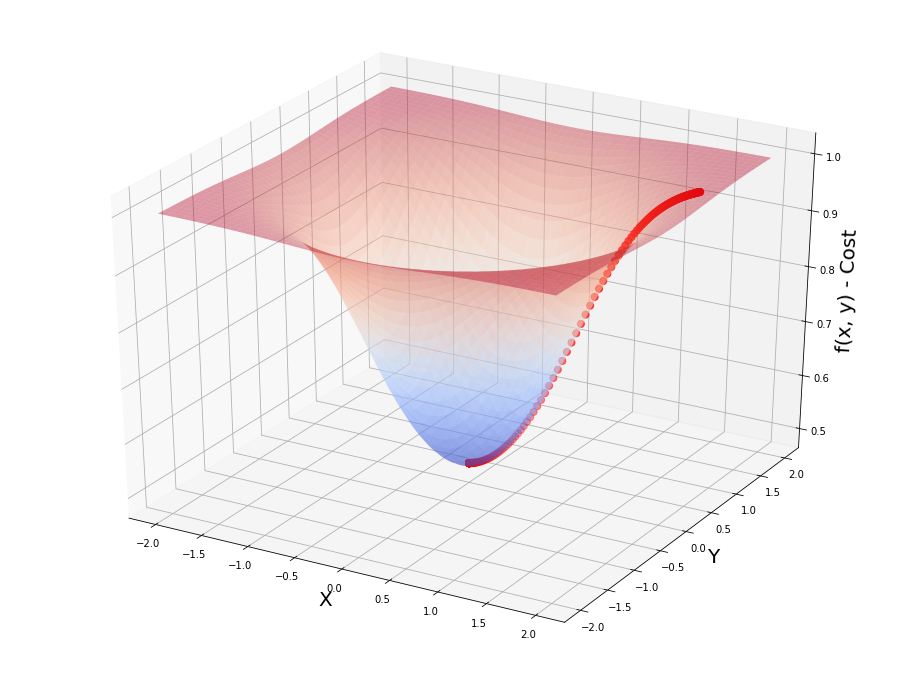

In [23]:
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)
ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha = 0.4)
ax.scatter(values_array[:,0], values_array[:,1], f(values_array[:,0], values_array[:,1]), s =50, color = 'red')
plt.show()